In [118]:
import cv2 as cv
import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt

In [34]:
train_set = pd.read_csv('MNIST/mnist_train.csv').values
test_set  = pd.read_csv('MNIST/mnist_test.csv').values

In [35]:
X_train = train_set[:,1:]
y_train = train_set[:,:1]

X_train = np.reshape(X_train, (60000,28,28,1))

X_train = X_train/255.

In [42]:
X_test = test_set[:,1:]
y_test = test_set[:,:1]

X_test = np.reshape(X_test, (10000,28,28,1))

X_test = X_test/255.

# CNN Architecture Building

In [49]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [53]:
model = Sequential()

model.add(Conv2D(28, kernel_size = (3,3), input_shape = (28,28,1)))
model.add(Conv2D(28, kernel_size = (3,3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(28, kernel_size = (3,3))
model.add(Conv2D(28, kernel_size = (3,3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128, activation = tf.nn.relu))
model.add(Dropout(0.2))

model.add(Dense(10, activation = tf.nn.softmax))

model.compile( optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [55]:
model.fit(x = X_train, y = y_train, epochs = 7)


Epoch 1/7
60000/60000 [==============================] - 65s 1ms/step - loss: 0.2090 - accuracy: 0.9362
Epoch 2/7
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0790 - accuracy: 0.9754
Epoch 3/7
60000/60000 [==============================] - 56s 931us/step - loss: 0.0566 - accuracy: 0.9817
Epoch 4/7
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0417 - accuracy: 0.9864
Epoch 5/7
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0322 - accuracy: 0.9894
Epoch 6/7
60000/60000 [==============================] - 59s 983us/step - loss: 0.0277 - accuracy: 0.9907s -
Epoch 7/7
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0232 - accuracy: 0.9921


In [56]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 3s 350us/step


[0.05549384021556907, 0.9851999878883362]

In [57]:
!ls

MNIST           MNIST CNN.ipynb Test


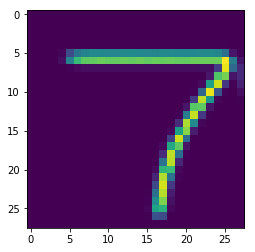

('This image is of a:', 7)


In [109]:
img = cv.imread('Test/seven.png')
gray = cv.cvtColor(img , cv.COLOR_BGR2GRAY)

gray = gray/255.
gray = 1. - gray 

gray = cv.resize( gray , (28,28))

plt.imshow(gray)
plt.show()

gray = np.reshape(gray, (1,28,28,1))

print ("This image is of a:",np.argmax(model.predict(gray)))
result = model.predict(gray)

In [110]:
ref = 0
for i in result[0]:
    print(i,ref)
    ref += 1

(0.0001230858, 0)
(0.0001292482, 1)
(0.024323074, 2)
(0.0012440826, 3)
(1.653645e-05, 4)
(0.0010936777, 5)
(1.05666e-06, 6)
(0.9626554, 7)
(0.010112739, 8)
(0.00030103544, 9)


In [99]:
np.argmax(result)

0

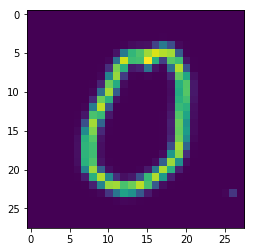

In [80]:
plt.imshow(gray)

In [77]:
img.shape

(155, 140, 3)

In [69]:
temp_img = np.reshape(train_set[0][1:], (28,28))

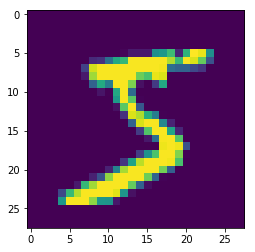

In [70]:
plt.imshow(temp_img)

In [71]:
temp_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [121]:
(X_train, y_train), (X_test, y_test) =  tf.keras.datasets.mnist.load_data()

In [133]:
X_test.shape

(10000, 28, 28)

In [134]:
y_test.shape

(10000,)

# Save Model/Weights

In [136]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [137]:
model.save('CNN_7Epoch.h5')